In [1]:
import cv2

In [2]:
import keras

Using TensorFlow backend.
/Users/loi/opt/anaconda3/envs/cv-basics/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/loi/opt/anaconda3/envs/cv-basics/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/loi/opt/anaconda3/envs/cv-basics/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/User

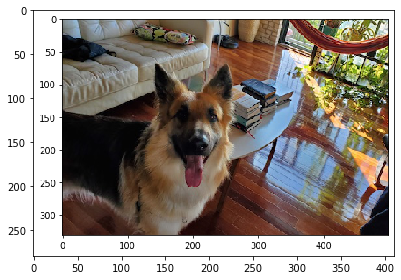

In [5]:
from skimage import io
img = io.imread('puppy.png')
io.imshow(img)

In [6]:
img.shape

(280, 411, 4)

In [7]:
from skimage import color
from skimage import data
from pylab import *

img_hsv = color.rgb2hsv(img)

ValueError: the input array must be have a shape == (.., ..,[ ..,] 3)), got (280, 411, 4)

In [ ]:
img_rgb = color.hsv2rgb(img_hsv)

In [ ]:
figure(0)
io.imshow(img_hsv)
figure(1)
io.imshow(img_rgb)

In [ ]:
img1 = cv2.imread('puppy.png')
img2 = cv2.imread('cat.png')

alpha = 0.8
beta = 0.2

final_image = cv2.addWeighted(img1, alpha, img2, beta, 0.0)

figure(0)
io.imshow(img2)
figure(1)
io.imshow(final_image)

In [ ]:
import numpy as np

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img2, "I am a cat", (230, 50), font, 0.8, (0, 255, 0), 2, cv2.LINE_AA)
io.imshow(img2)

In [ ]:
image_original = img2
image_median = cv2.imread('cat.png')
image_gaussian = cv2.imread('cat.png')
image_bilateral = cv2.imread('cat.png')

image_median = cv2.medianBlur(img2, 9)
image_gaussian = cv2.GaussianBlur(img2, (9,9), 10)
image_bilateral = cv2.bilateralFilter(img2, 9, 100, 75)

In [ ]:
figure(0)
io.imshow(image_original)
figure(1)
io.imshow(image_median)
figure(2)
io.imshow(image_gaussian)
figure(3)
io.imshow(image_bilateral)

In [ ]:
cv2.GaussianBlur(image_original, (3, 3), 0)
gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
src_eqlzd = cv2.equalizeHist(gray)
figure(0)
io.imshow(gray)
figure(1)
io.imshow(src_eqlzd)

In [ ]:
grad_x = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

In [ ]:
grad_y = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
io.imshow(grad)

In [ ]:
edges = cv2.Canny(gray,40,55,apertureSize = 3)
edges = cv2.bitwise_not(edges)
cv2.imwrite("catlines.jpg", edges)
catlines = cv2.imread("catlines.jpg")
io.imshow(catlines)